In [1]:
import numpy as np
import gurobipy as gp
import pandas as pd

In [2]:
obj = pd.read_csv('ROI_data.csv') #Read file into a dataframe

In [3]:
obj = obj.set_index(obj.columns[0]) #Set the first column as index for easier access

In [4]:
obj

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


Let the Decision Variables be the amount invested in each medium, i.e. \
$x_{i}$ = Amount invested in each medium 

The constraints are as follows (in no particular order):

1. Print and TV should be less than amount spent on Facebook and Email. Therefore, the equation would be\
    $x_{1}$ + $x_{2}$ - $x_{5}$ - $x_{10}$ $\le$ 0
    
2. Amount in social media >= 2 * (Amount spent in SEO and Adwords)\
    $x_{5}$ + $x_{6}$ + $x_{7}$ + $x_{8}$ + $x_{9}$ - $x_{3}$ -$x_{4}$ $\ge$ 0
 
3. Total Budget is 10 Million USD\
    $x_{1}$ + $x_{2}$ + $x_{3}$ + $x_{4}$ + $x_{5}$ + $x_{6}$ + $x_{7}$ + $x_{8}$ + $x_{9}$ + $x_{10}$ $\le$ 10
    
4. Each individual investment cannot be more than 3 Million USD. We will use this constraint in upper bounds while modelling the problem\
    0  $\le$ $x_{1}$  $\le$ 3\
    0  $\le$ $x_{2}$  $\le$ 3\
    0  $\le$ $x_{3}$  $\le$ 3\
    0  $\le$ $x_{4}$  $\le$ 3\
    0  $\le$ $x_{5}$  $\le$ 3\
    0  $\le$ $x_{6}$  $\le$ 3\
    0  $\le$ $x_{7}$  $\le$ 3\
    0  $\le$ $x_{8}$  $\le$ 3\
    0  $\le$ $x_{9}$  $\le$ 3\
    0  $\le$ $x_{10}$  $\le$ 3
    
  


In [5]:
A = np.zeros((3,10))
A[0,:]=[1,1,0,0,-1,0,0,0,0,-1] #First constraint Print+TV < Facebook + Email
A[1,:]=[0,0,-2,-2,1,1,1,1,1,0] # Social Media > 2(SEO + Adwords)
A[2,:]=[1,1,1,1,1,1,1,1,1,1] # Total Budget constraint

In [6]:
b = np.array([0,0,10]) # Right Hand Side Limits of constraints
sense = np.array(['<','>','<']) 

We need to maximize the ROI for the model. Given the ROI matrix for the problem:

The Objective Function is as follows:\
&emsp; 0.031 $x_{1}$ + 0.049 $x_{2}$ + 0.024 $x_{3}$ + 0.039 $x_{4}$ + 0.016 $x_{5}$ + 0.024 $x_{6}$ + 0.046 $x_{7}$ + 0.026 $x_{8}$ + 0.033 $x_{9}$ + 0.044 $x_{10}$

In [7]:
pModel = gp.Model() # initialize an empty model

pModX = pModel.addMVar(10,ub=np.array([3,3,3,3,3,3,3,3,3,3])) #Decision Variables add the upper bounds as 3million USD for each investment
pModCon = pModel.addMConstrs(A, pModX, sense, b) # add the constraints to the model
pModel.setMObjective(None,obj.iloc[0],0,sense=gp.GRB.MAXIMIZE) # Maximize the ROI for the model 

pModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
pModel.Params.TimeLimit = 3600

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-19


In [8]:
pModel.optimize() 


The ROI achieved (max) given the constraints, is 0.456 Million ~ 456000 USD 

In [9]:
pModel.objVal #The Objective Function

0.45600000000000007

The Optimal Investments are given by: 

In [10]:
pModel.x # The optimal solution

[0.0, 3.0, 0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0]

In [11]:
x_df= pd.DataFrame(pModel.x, index=obj.columns, columns={'Investment(Million $)'})
x_df #Better View of investments across mediums

,Investment(Million $)
Print,0.0
TV,3.0
SEO,0.0
AdWords,1.0
Facebook,0.0
LinkedIn,0.0
Instagram,3.0
Snapchat,0.0
Twitter,0.0
Email,3.0


In [12]:
import matplotlib.pyplot as plt

<AxesSubplot:>

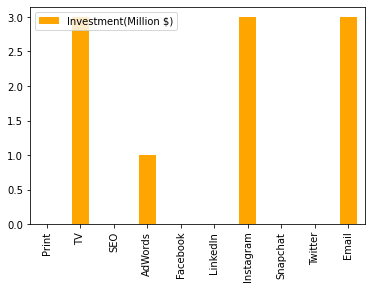

In [13]:
x_df.plot(kind='bar', color='Orange')

### Q4

Your boss is happy to see the promising results presented by the marketing department.
However, your boss is also very concerned because your boss recalls being somewhat
disappointed after following such recommendations in the past. To be cautious about the
decision, your team has decided to get another opinion about the ROI data and rerun the
analysis. The second consulting firm returns the estimates of the ROI data in the table below
(also in the CSV file mentioned above). You are asked to compare the two optimal allocations
from these two ROI estimates.

We use the second row of the ROI matrix from the obj variable

In [14]:
pModel2 = gp.Model() # initialize an empty model

pModX2 = pModel2.addMVar(10,ub=np.array([3,3,3,3,3,3,3,3,3,3])) # Same as Question 1 
pModCon2 = pModel2.addMConstrs(A, pModX2, sense, b) # add the constraints to the model
pModel2.setMObjective(None,obj.iloc[1],0,sense=gp.GRB.MAXIMIZE) 
pModel2.Params.OutputFlag = 0 
pModel2.Params.TimeLimit = 3600

In [15]:
pModel2.optimize()

We observe that the Objective function or the ROI observed in both cases is the same 456000 USD

In [16]:
pModel2.objVal 

0.45600000000000007

In [17]:
pModel2.x

[3.0, 0.0, 0.0, 1.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0]

However, the investments are different compared to the case 1. 
Intuitively it makes sense as investments go to the channels with higher ROI

In [19]:
x_df2= pd.DataFrame(pModel2.x, index=obj.columns, columns={'Investment(Million $)'})
x_df2 #Better View of investments across mediums

,Investment(Million $)
Print,3.0
TV,0.0
SEO,0.0
AdWords,1.0
Facebook,3.0
LinkedIn,3.0
Instagram,0.0
Snapchat,0.0
Twitter,0.0
Email,0.0


<AxesSubplot:>

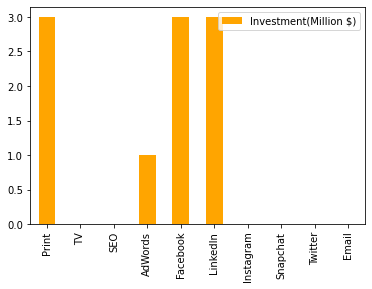

In [20]:
x_df2.plot(kind='bar', color='Orange')

## Q5

Are the allocations the same? Assuming the first ROI data is correct, if you were to use the
second allocation (the allocation that assumed the second ROI data was correct) how much
lower would the objective be relative to the optimal objective (the one that uses the first ROI
data and the first allocation)? Assuming the second ROI data is correct, if you used the first
allocation how much lower would the objective be relative to the optimal objective? Do you
think the third constraint above, based on your boss’ experience, is useful?

The Allocations are different as the ROI estimates are different for channels. For eg, the Print ROI was increased from 3.1 percent to 4.9 percent and hence we see 3 million allocated to Print in the second case unlike the first case. 

To check whether the third constraint, i.e. the individual investment less than 3 Million USD, we will test both cases with no upper bounds to check how the investments vary
i) First Case ROI estimates with no upper bound

In [21]:
pModel3 = gp.Model() # initialize an empty model

pModX3 = pModel3.addMVar(10) # tell the model how many variables there are
pModCon3 = pModel3.addMConstrs(A, pModX3, sense, b) # add the constraints to the model
pModel3.setMObjective(None,obj.iloc[0],0,sense=gp.GRB.MAXIMIZE) 

pModel3.Params.OutputFlag = 0 
pModel3.Params.TimeLimit = 3600

In [22]:
pModel3.optimize()

The ROI has increased to ~ 465000 USD 

In [23]:
pModel3.objVal #The Objective Function

0.46499999999999997

In [24]:
pModel3.x

[0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0]

The investments have changed. We observe investments only in TV and Email

In [25]:
x_df3= pd.DataFrame(pModel3.x, index=obj.columns, columns={'Investment(Million $)'})
x_df3 #Better View of investments across mediums

,Investment(Million $)
Print,0.0
TV,5.0
SEO,0.0
AdWords,0.0
Facebook,0.0
LinkedIn,0.0
Instagram,0.0
Snapchat,0.0
Twitter,0.0
Email,5.0


ii) Second Case ROI Estimates with No upper Bound constraint (3 Million for individual investment)

In [26]:
pModel4 = gp.Model() # initialize an empty model

pModX4 = pModel4.addMVar(10) # tell the model how many variables there are
pModCon4 = pModel4.addMConstrs(A, pModX4, sense, b) # add the constraints to the model
pModel4.setMObjective(None,obj.iloc[1],0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

pModel4.Params.OutputFlag = 0 
pModel4.Params.TimeLimit = 3600

In [27]:
pModel4.optimize()

In [28]:
pModel4.objVal

0.46499999999999997

In [29]:
pModel4.x

[5.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0]

We observe investments only in Print and Facebook

In [30]:
x_df4= pd.DataFrame(pModel4.x, index=obj.columns, columns={'Investment(Million $)'})
x_df4 #Better View of investments across mediums

,Investment(Million $)
Print,5.0
TV,0.0
SEO,0.0
AdWords,0.0
Facebook,5.0
LinkedIn,0.0
Instagram,0.0
Snapchat,0.0
Twitter,0.0
Email,0.0


We see that though the objective/ROI has increased. The problem solves such that unfair amounts of funds get allocated to either TV and Email (first ROI estimates) or  Print and Facebook (based on second ROI estimates). This could lead to lack of presence/marketing on other channels so keeping the upper bound on the individual investments would lead to a fair distribution among the mediums. 

## Q6


To explore this further perform some analysis of how your optimal allocation would change
based on changes in the ROI data. Use the first ROI data as your starting point. By how much
could each advertising medium’s ROI increase or decrease and still result in the same optimal
allocation you found in step (3)?

We perform Sensitivity Analysis to see how much the ROI (Objective function) can change for the optimal solution(investment in each channel) to be the same 

In [31]:
pModX.SAObjLow #Lower threshold Sensitivity Analysis

array([ -inf, 0.039,  -inf, 0.033,  -inf,  -inf, 0.039,  -inf,  -inf,
       0.029])

In [32]:
pModX.SAObjUp #Upper threshold of individual ROI estimates

array([0.049, 0.062, 0.039, 0.046, 0.029, 0.039,   inf, 0.039, 0.039,
         inf])

The advertising medium's ROI can be decreased by the below amount for each channel

In [33]:
obj.iloc[0]-pModX.SAObjLow  #Calculate the difference

Print          inf
TV           0.010
SEO            inf
AdWords      0.006
Facebook       inf
LinkedIn       inf
Instagram    0.007
Snapchat       inf
Twitter        inf
Email        0.015
Name: ROI, dtype: float64

The advertising medium's ROI can be increased by the below amount for each channel

In [34]:
pModX.SAObjUp-obj.iloc[0] #Calculate the difference between upper threshold and the given ROI estimates

Print        0.018
TV           0.013
SEO          0.015
AdWords      0.007
Facebook     0.013
LinkedIn     0.015
Instagram      inf
Snapchat     0.013
Twitter      0.006
Email          inf
Name: ROI, dtype: float64

## Q7

Your boss has gained permission to reinvest half of the return. For example, if the marketing
obtains a 4% return in January, the budget of February will be $10 M + $10 M × 4% × 50% =
$10.2M. The monthly ROI for next year is given in Project1.Rdata. The three constraints given
by your boss are still in place for each month. What is the optimal allocation for each month?

We need to iterate the modelling over each month as our budget constraint changes every month. We first read the estimates for the entire year

In [35]:
obj7 = pd.read_csv('ROI_mat.csv') #Read CSV file

In [36]:
obj7.rename( columns={'Unnamed: 0':'Month'}, inplace=True )

In [37]:
obj7 = obj7.set_index('Month') #Set Index as Month

In [38]:
obj7=obj7/100 # They are in percentages and dividing for the correct Objective function 

Below is the Objective Function Matrix

For Eg, for January the objective function to be maximized would be :\
 &emsp; 0.040 $x_{1}$ + 0.036 $x_{2}$ + 0.024 $x_{3}$ + 0.039 $x_{4}$ + 0.030 $x_{5}$ + 0.035 $x_{6}$ + 0.036 $x_{7}$ + 0.0225 $x_{8}$ + 0.035 $x_{9}$ + 0.035 $x_{10}$   


In [39]:
obj7
    

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Month,,,,,,,,,,
January,0.040,0.036,0.024,0.039,0.030,0.035,0.036,0.0225,0.035,0.035
February,0.040,0.039,0.027,0.038,0.043,0.032,0.027,0.0180,0.037,0.035
March,0.035,0.029,0.031,0.038,0.024,0.041,0.037,0.0260,0.042,0.025
April,0.038,0.031,0.024,0.044,0.024,0.038,0.037,0.0250,0.036,0.029
May,0.035,0.032,0.019,0.034,0.027,0.027,0.039,0.0220,0.045,0.039
June,0.040,0.032,0.027,0.034,0.034,0.030,0.045,0.0210,0.038,0.041
July,0.039,0.036,0.020,0.044,0.039,0.037,0.043,0.0180,0.040,0.038
August,0.042,0.033,0.028,0.042,0.020,0.037,0.036,0.0150,0.044,0.043
September,0.041,0.028,0.025,0.042,0.029,0.037,0.028,0.0250,0.040,0.034


The Decision Variables now would be the form of\
&emsp; $x_{i,j}$  where i stands for the month and 
                  j stands for the Marketing medium\
Hence we will have 12 months * 10 marketing mediums = 120 decision variables. 

We would iterate one model over the 12 months with the same constraints except for the budget constraint (as the RHS for budget would change every month) 

In [40]:
budget =  10 #Initial budget is 10M USD
i=0 
X = np.zeros((12,10)) # We have 10 decision variables for every month 
ROI_total=np.zeros((12,1))
budget_array=np.zeros((12,1))
budget_array[0,:]=10 #First Month budget is 10 Million
for index, row in obj7.iterrows():
    b = np.array([0,0,budget])
    p7Model = gp.Model() # initialize an empty model
    
    p7ModX = p7Model.addMVar(10,ub=np.array([3,3,3,3,3,3,3,3,3,3])) # Upper bound stays the same for every month
    p7ModCon = p7Model.addMConstrs(A, p7ModX, sense, b) # add the constraints to the model
    p7Model.setMObjective(None,obj7.iloc[i],0,sense=gp.GRB.MAXIMIZE) 
    p7Model.Params.OutputFlag = 0 
    p7Model.Params.TimeLimit = 3600
    p7Model.optimize()
    X[i,:]=p7Model.x #Store the Optimal solution in an array
    ROI_total[i,:]=p7Model.objVal #Store the Objective Function/ROI in array
    budget=budget + (budget*ROI_total[i,0]*0.05) #Half the budget * ROI percent of the previous month + Budget
    i=i+1
    if i<12:
        budget_array[i,:]=budget
        
    

In [41]:
X_d=pd.DataFrame(X, index=obj7.index, columns=obj7.columns) # COnvert array to Dataframe

The optimal allocation for the entire year as follows (in Million $)

In [42]:
ROI_total_d=pd.DataFrame(ROI_total, index=obj7.index) #ROI Dataframe
budget_d=pd.DataFrame(budget_array, index=obj7.index) #Budget Dataframe
ROI_total_d.rename( columns={0:'ROI (Million $)'}, inplace=True )
budget_d.rename( columns={0:'Budget(Million $)'}, inplace=True )

The total ROI (optimal) observed in all the months (in $)

In [43]:
ROI_total_d*1000000

,ROI (Million $)
Month,
January,373000.000000
February,406296.000000
March,414557.158277
April,414919.334024
May,433013.658149
June,456409.810909
July,471319.657683
August,491858.936283
September,464527.798012


Allocation matrix with Monthly Budget and Monthly ROI (In Million $)

In [44]:
Allocation_Matrix=pd.concat([X_d, ROI_total_d,budget_d], axis=1)
Allocation_Matrix

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,ROI (Million $),Budget(Million $)
Month,,,,,,,,,,,,
January,3.000000,0.0,0.0,1.333333,0.000000,0.000000,2.666667,0.0,0.000000,3.000000,0.373000,10.000000
February,3.000000,0.0,0.0,2.395500,3.000000,0.000000,0.000000,0.0,1.791000,0.000000,0.406296,10.186500
March,0.000000,0.0,0.0,3.000000,0.000000,3.000000,1.393437,0.0,3.000000,0.000000,0.414557,10.393437
April,0.000000,0.0,0.0,3.000000,0.000000,3.000000,3.000000,0.0,1.608870,0.000000,0.414919,10.608870
May,1.828962,0.0,0.0,0.000000,0.000000,0.000000,3.000000,0.0,3.000000,3.000000,0.433014,10.828962
June,3.000000,0.0,0.0,0.000000,0.000000,0.000000,3.000000,0.0,2.063416,3.000000,0.456410,11.063416
July,1.157944,0.0,0.0,3.000000,1.157944,0.000000,3.000000,0.0,3.000000,0.000000,0.471320,11.315889
August,3.000000,0.0,0.0,1.860853,0.000000,0.721706,0.000000,0.0,3.000000,3.000000,0.491859,11.582559
September,1.433704,0.0,0.0,3.000000,0.000000,3.000000,0.000000,0.0,3.000000,1.433704,0.464528,11.867408


In [45]:
ROI_percent = Allocation_Matrix['ROI (Million $)']*100/Allocation_Matrix['Budget(Million $)']

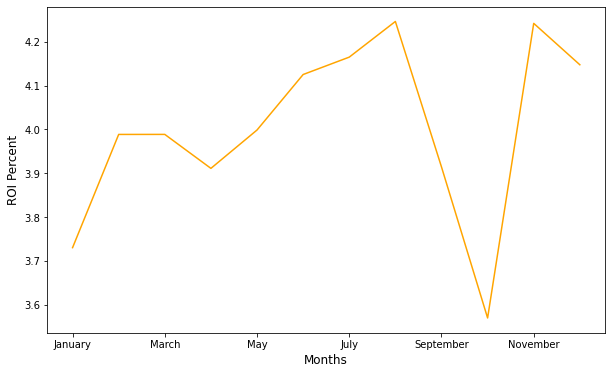

In [46]:
ax = ROI_percent.plot(figsize=(10, 6), color='orange')
ax.set_ylabel('ROI Percent', fontsize=12)
ax.set_xlabel('Months', fontsize=12)
plt.show()

## Q8

A stable budget is defined as a monthly allocation such that for each platform the monthly
change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not
need to solve a new optimization model. Describe how my might model this?

In [47]:
X_d.diff() #We check the difference using diff function 

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Month,,,,,,,,,,
January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,0.000000,0.0,0.0,1.062167,3.000000,0.000000,-2.666667,0.0,1.791000,-3.000000
March,-3.000000,0.0,0.0,0.604500,-3.000000,3.000000,1.393437,0.0,1.209000,0.000000
April,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.606563,0.0,-1.391130,0.000000
May,1.828962,0.0,0.0,-3.000000,0.000000,-3.000000,0.000000,0.0,1.391130,3.000000
June,1.171038,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.936584,0.000000
July,-1.842056,0.0,0.0,3.000000,1.157944,0.000000,0.000000,0.0,0.936584,-3.000000
August,1.842056,0.0,0.0,-1.139147,-1.157944,0.721706,-3.000000,0.0,0.000000,3.000000
September,-1.566296,0.0,0.0,1.139147,0.000000,2.278294,0.000000,0.0,0.000000,-1.566296


We observe that it isn't a stable budget as the monthly allocation changes by way more than 1 Million USD for each platform. To make it stable, we will take the array of optimal solution for each month. In this case X[i,:] stores each Model.X values. While running the modelling for February we specify the lower bounds and upper bounds as the optimal solution for January &pm; 1. This would give us a stable allocation model such that monthly change isn't more than $1M

So,for February 
    lb = X[0,:]-1
    ub = X[0,:]+1

Note: X[0, :] would contain the optimal allocation for January \
lb refers to Lower Bounds which are added while initializing the number of decision variables in model 
ub refers to Upper Bounds of the decision variables which were set to a constant 3 in the above questions